Iris dataset contains information about iris flowers, including features such as sepal length, sepal width, petal length, and petal width. The dataset consists of 150 samples, with each sample belonging to one of three species of iris flowers: Setosa, Versicolor, and Virginica. 

Trained a K-Means clustering model with 3 clusters and predicted cluster assignments for each data point using the trained model. The silhouette score was then calculated to evaluate the clustering performance, providing insight into the compactness and separation of the clusters.

When applying feature scaling to the data using StandardScaler and constructing the K-Means clustering algorithm, identifying the optimal value for k through the elbow curve method proved challenging. The curve exhibited considerable waviness, making it difficult to pinpoint the precise value of k.

### Step 1: Import Required Libraries

In [224]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

### Step 2: Load Dataset:

In [225]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

In [226]:
# #Feature Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

### Step 3: Calculate SSE for different values of k

In [227]:
sse = []
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2)
	km.fit(X)
	sse.append(km.inertia_)

### Step 4: Plot the elbow curve

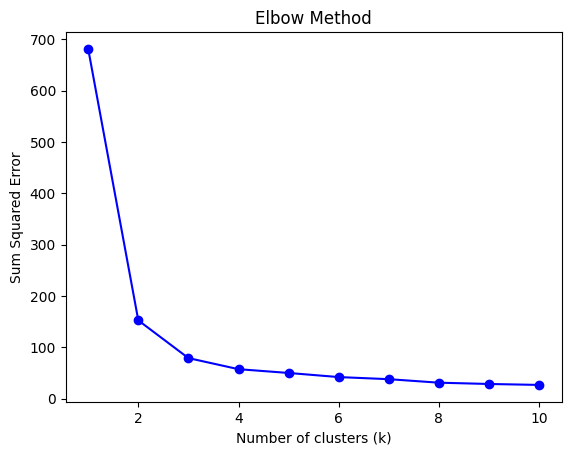

In [228]:
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum Squared Error")
plt.title("Elbow Method")

# Display the plot
plt.show()

The Elbow curve indicates that the optimal value for k is 3.

### Step 5: Train the K-Means model

In [229]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [230]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

### Step 6: Predict cluster assignments

In [231]:
pred = kmeans.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Step 7: Evaluate the model

In [232]:
# Evaluate the model
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.551191604619592


### Step 8: Visualize the clusters 

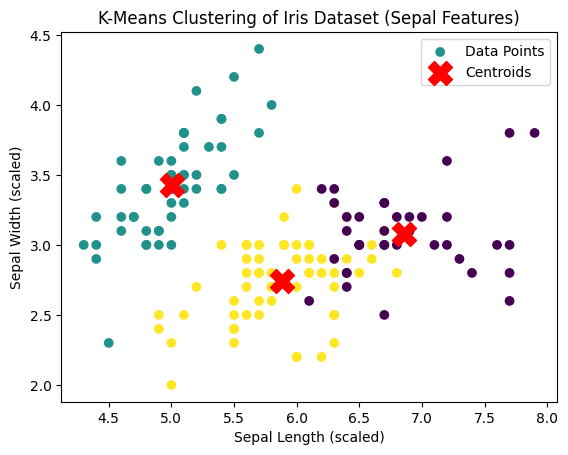

In [233]:
# visualize the clusters in a scatter plot of two features (Sepal Length vs. Sepal Width). Each point is colored according to its cluster assignment.
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-Means Clustering of Iris Dataset (Sepal Features)')
plt.legend()
plt.show()


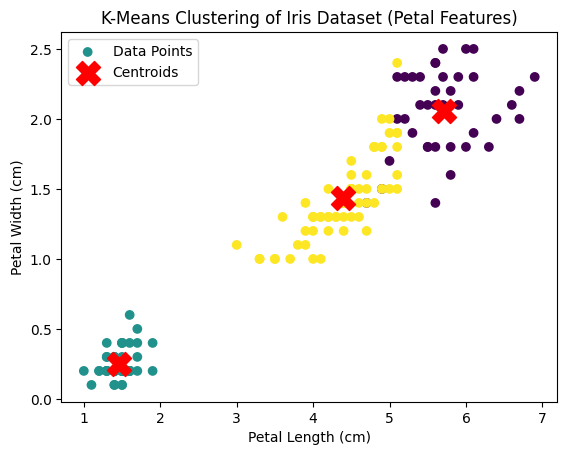

In [234]:
# Visualize visualize the clusters in a scatter plot of two features (Petal Length vs. Petal Width). Each point is colored according to its cluster assignment.
plt.scatter(X[:, 2], X[:, 3], c=pred, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset (Petal Features)')
plt.legend()
plt.show()
